## Understanding someone else's big code. ##

# CONTRIBUTORS #

This in-class exercise is to be done in pairs. Add the names of the two students in this text block.


# Workflow for today (reminder)

Up until this point we have developed Jupyter notebooks that we could run in Colab to avoid the need to maintain our own environment. Now that we're moving towards developing standalone apps and interacting with robots you will need to maintain your own environment on your own laptop. This will be a little painful for folks who are relatively new to using computers beyond email/internet/microsoft office. Please make full use of office hours to get help as needed - we are building in a little buffer before the next HW for you to take care of this, but "I couldn't get vscode up on my machine" will not be an accepted excuse for the next HW.

**VSCode configuration.**
The following directions will get you in a nice setup so that you can easily jump between the rockpaperscissors code and this jupyter notebook. To start, make a subdirectory on your computer and copy the contents of the `Code examples > bouncy_rockpaperscissors` directory into it. I'll refer to this as `my_folder`.
* Open the folder by selecting `File > Open Folder...` and then pointing your file explorer to where you created `my_folder`. This tells vscode what directory to execute code in.
* Open the `rockpaperscissors_with_population_monitoring.py` file by selecting `File > Open file...` and selecting it. This will open the python file in the editor.
* Click the button in the top right of the pane that looks like two tall skinny rectangles next to each other. (I've included a screencap here to help you find it.) 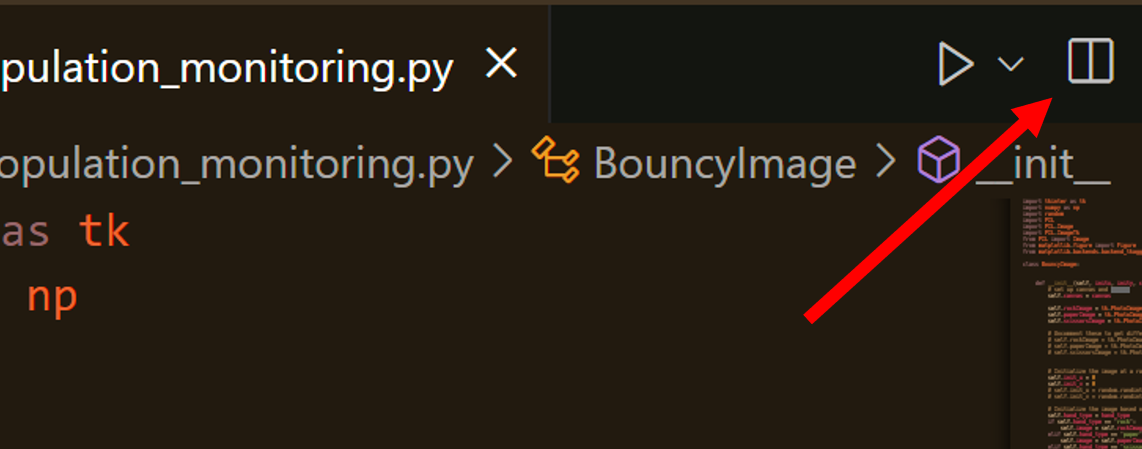 This will split your window so that you can edit two files simultaneously.
* Click the new pane that pops up. Load the jupyter notebook in that pane by selecting `File > Open file...` and then pointing it to wherever you have this jupyter notebook file saved on your computer.

This will make it so that you can easily see both files simultaneously instead of needing to flip back and forth all of the time.

# Today's exercise #

Today you will complete the exercise from Monday if you were unable to finish it. Once you do, you should have the basics of `tkinter` under your belt, and a working vscode environment. Congratulations! That was not an easy thing to pull together, and now we are ready to do some cool science.

Once you finish Monday's exercise, you will learn how to read a complex program that somebody else wrote. This is something that will take some practice. Reading other peoples code is different from writing it yourself - **you don't need to understand the syntax for every single line**, and many small details will be challenging to understand why the original author would have set them up a certain way. You can still understand enough of what's going to make their code "go" though, and to modify it to do another task.

**Warning!** This will feel overwhelming - this is a big, complicated program you're taking a look at! Don't freak out. You will frequently be running other peoples big complicated code. Today's exercise is designed help you learn to be resilient and self-sufficient.

**Overview.** I've already shown the bouncyrockpaperscissors code in class. When you run it, it will initialize a bunch of circles on a canvas, which are assigned a rock, paper or scissors ID. For each circle, we are using the explicit Euler method to move them through space, solving the following equation:
$$\dot{x}_i = u_i$$
$$\dot{u}_i = \sum_j F(x_i-x_j)$$
The $F$ term is a *pair-wise force* that describes how image i is either attracted or repulsed by image j. I've set the code up so that images are attracted to their prey (e.g. scissors chase paper), are repulsed by their predator (e.g. scissors run away from rock), and are gently repulsed by others of the same type (e.g. scissors drift apart from other scissors). When a predator catches its prey, the prey's type is switched to match the predator (e.g. when scissors collide with paper, the paper is turned into a scissors). There is also some logic to make each rock/paper/scissor bounce off the wall so they don't run off the screen.

**Objective.** Today we will do 2 things.
1. Practice reading code, to determine what the key pieces of the code are and understand the flow of the code. We will use both the debugger and a LLM to practice this.
2. Tweak the code to change the images rendered, modify the forces acting on the particles and write the output of the simulation to disk so that we can use it later on for data we can machine learn a model for.

# Reading a big scary code. #

The first step is to get a handle on how the code functions. The debugger is a great tool to help you do this. I took the same skeleton from monday's exercises when I wrote this, so you should recognize bits and pieces - specifically take a look at the `if __name__ == "__main__":` function on line 289. This is where the code will start executing when you hit run.

Click just to the left of 291 and a little red circle will appear. If you click it again it will disappear. This is a *breakpoint*. If you run the code (`Run > Start debugging` or `F5` (Windows) or `Command + F5` (Mac)) it will run until it hits a breakpoint.
At that point, two things will pop up:

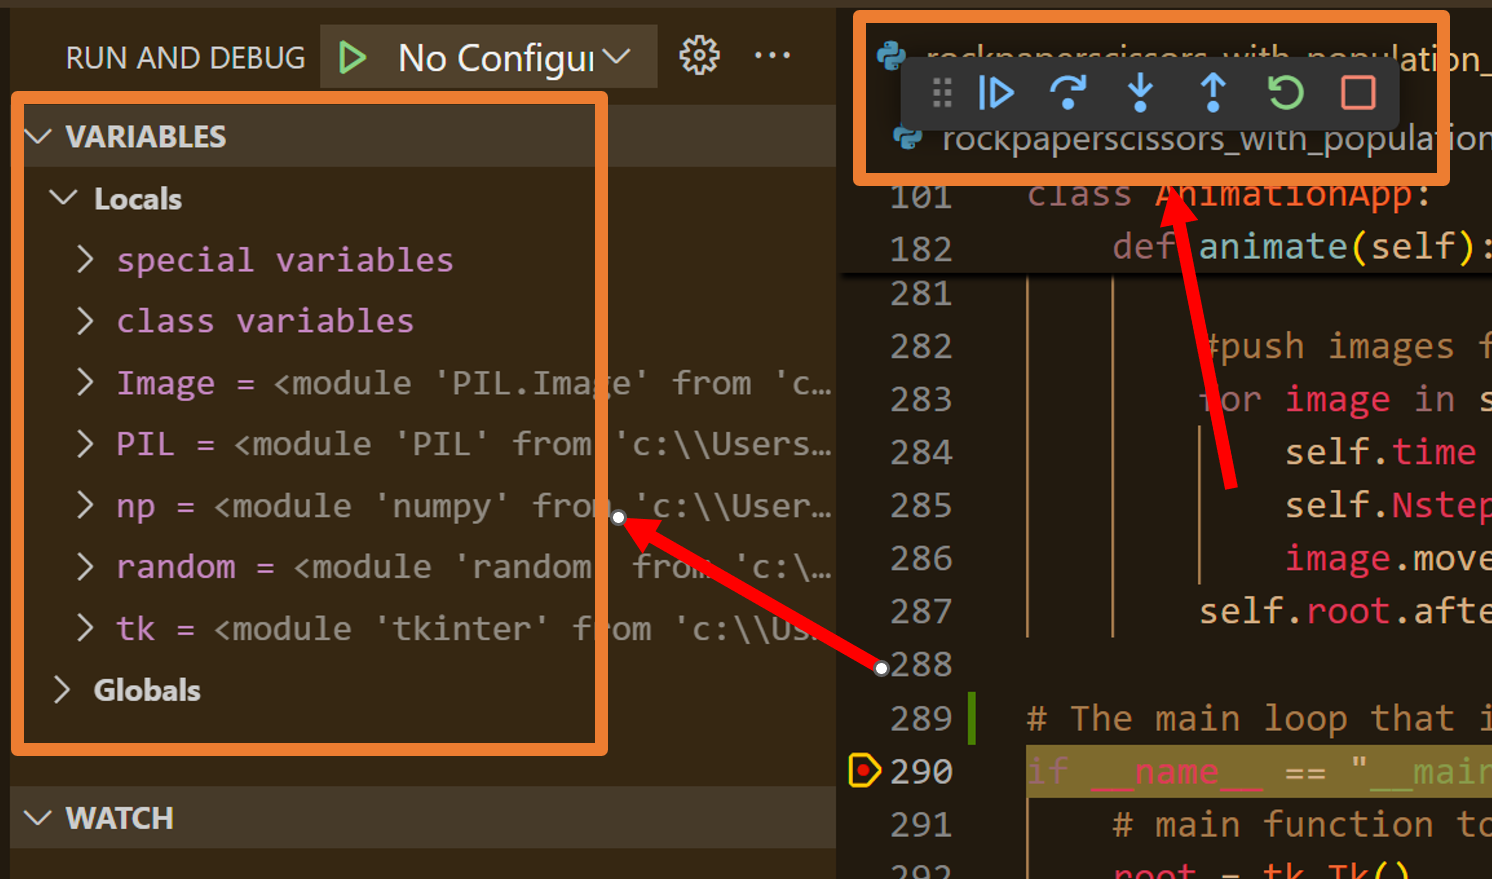

* On the left you will see a variables pane. This shows all of the variables in your program, and the current values that they're taking. You can use this to keep an eye on what variables take what values. Before we used print statements to do this, but this is a much nicer and more sophisticated way to track things in real time.
* On the top right you have the debugger control panel. From left to right the buttons are:
    1. Continue (vetical blue line with blue triangle). Keep running the program until it either terminates or you hit another breakpoint.
    2. Step over (dot with circular arc pointing right). Execute the current line of code and move to the next line of code.
    3. Step into (dot with downward arrow). Execute the current line of code, and if it is a function or class, jump to the function/class definition in the code. *Tip:* Be careful with this one, if you zoom in too far you'll leave the rockpaperscissors program and go into the actual python code base. You can always zoom back out if that happens (see next bullet).
    4. Step out of (dot with upward arrow). Execute the rest of the code at the current scope (i.e. finish the function you're in) to "zoom out".
    5. Restart (green circular arrow). Restart the code from the beginning.
    6. Stop (red square). End the debugging session.

**Your turn.** Add a breakpoint to line 15, which is the initializer of the BouncyImage class. Click continue so that it runs until a BouncyImage is made, and then click step out so you can see where the BouncyImages are being made. Write the function where they're being made in the block below.

*Put stuff here.*

**Your turn.** Continue to play around with the debugger, adding breakpoints and stepping in/out until you have a sense of what functions the program is calling and why. Describe (briefly) in the box below what functions the code is calling at each step of the simulation.

*Put stuff here.*

# Getting help from an LLM #

While LLM struggle to write code for very complex tasks, they are remarkably good at describing/summarizing the basic functionality. Try experimenting with prompts in Gemini to get a sense of how the code is working. The following prompts might get you started.

* `prompt > Summarize the following code: [paste code from your editor intor the window]`
* `prompt > In the previous code, what is the basic functionality of the bouncyImage class?`
* `prompt > In the previous code, what is the basic functionality of the AnimationApp class?`
* `prompt > Where in the previous code are the images chosen to render each bouncyImage?`
* `prompt > Where are the forces calculated to update the position and velocity of each bouncyImage?`
* `prompt > What does the calculate_population function do?`

Some of these will work, some won't. Experiment to see how much detective work you can get the LLM to do for you.

**Your turn.** In the block below, enter the actual expression used to compute the pairwise $F(x_i,x_j)$ force described abstractly above.

**Your turn.** Modify the images rendered for each rock/paper/scissors to an image you pick yourself. In the project directory you'll see `rock2.png`, `paper2.png`, `scissors2.png`. My daughter told me she thought we should have cool rock paper scissors with sunglasses and I asked Dall-E to make it for me. Then I asked it: `prompt > change the image to make it scary` and got scissors3.png. You could experiment with that, or maybe just grab something off of [Google image search](images.google.com). Paste an image of your modified graphics in the block below.

*Put stuff here.*

# Final task #

In the coming homework assignment we will use data from this simulator to attempt to machine learn a model for population dynamics. In today's final exercise you will extract the population data stored in the `pop_list` variable once you've decided that the simulation has finished running. 

**Your turn.** Output the data from the simulation, either into a google sheet (like we did at the beginning of the course) or as a text file.

# Turning in assignments on Canvas #
In order to submit your assignment as a pair, you need to create a group on Canvas. This will enable you to both receive the same grade for one submission.

On Canvas, navigate to People > Groups > In-Class 11.
Find an empty group and add the names of both members of the pair.

Submit your work as both an ipynb and a pdf to Canvas.

Save the ipynb and upload from your hard drive. Also print a pdf file to ensure the graders can see you have completed the exercise, even if there are issues with the formatting in your jupyter notebook.

The student who did not submit should make sure that the group was created successfully by checking that they can also access the files on their Canvas page.